# 2. The Basic SIR Model

This section is adapted from a project by Dr. Yiheng Liang.

## Introduction

The SIR model is a system of three ordinary differential equations that describe epidemics, where where at time $t$,

$S(t)$ the number of susceptible individuals, 

$I(t)$ is the number of infectious individuals, 

$R(t)$ is number of individuals who have recovered.

The differential equations are 

Equation (1)

$$
dS/dt = -\beta S I
$$

The number of susceptibles ($S$) decreases with time at a rate proportional to the number of encounters $S I$ between susceptibles and infectives (with a constant of proportionality $\beta$).


Equation (2)

$$
dI/dt = \beta S I - \gamma I
$$

The number of infectious people $I$ is increasing with respect to time $t$, proportional to the number of encounters $S I$ between susceptibles and infectives (with a constant of proportionality beta) and decreasing proportional to the number of infectives $I$ present (with a constant of proportionality gamma).

Equation (3)

$$
dR/dt = \gamma I.
$$

The rate of recovered people $R$ is increasing at a rate proportional to the number infected $I$ (with a constant of proportionality gamma.)

 The parameter $\beta>0$ is called the transmission rate, and the parameter $\gamma>0$ is the recovery rate. 

### Numerical Solutions

We now show how to use an ODE solver to obtain graphs of the solutions $S(t)$, $I(t)$ and $R(t)$ for the following parameter values and initial conditions:

<b>PARAMETER VALUES</b>

$\beta$ (transmission_rate) = 0.000001, 

$\gamma$ (recovery_rate) = 0.2.

<b>INITIAL CONDITIONS</b>

$S_0 = 1,000,000$  (Initial number of susceptibles)

$I_0 = 1$  (Initial number of infectives)

$R_0 = 0$ (initial number of recovered)



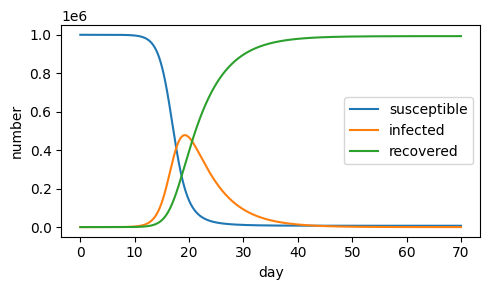

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define Equations
def f(y, t, params):
    S, I, R = y      # unpack current values of y
    beta, gamma      # unpack parameters
    #specify dS/dt, dI/dt and dR/dt
    derivs = [-beta * S * I,  
             beta * S * I - gamma * I,
             gamma * I]  
    return derivs

# Parameters
beta=.000001
gamma=.2
# Initial values
S0=1000000
I0=1
R0=0

# Bundle parameters for ODE solver
params = [beta,gamma]
# Bundle initial conditions for ODE solver
y0 = [S0,I0,R0]

# Make time array for solution
tStop = 70  # number of days
tInc = .001  
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(5,3))
plt.plot(t, psoln[:,0],label='susceptible')
plt.plot(t, psoln[:,1],label='infected')
plt.plot(t, psoln[:,2],label='recovered')
plt.legend()
plt.xlabel('day')
plt.ylabel('number')
plt.savefig("SIR.png")
plt.tight_layout()
plt.show()

Note that the transmission rate is sufficiently low that allows for a full recovery of the population (end of epidemic) by roughly day 40.

### Assignment

1) Investigate how the parameter change affects the disease progression. 


(a) What happens if you change the population to a smaller or a larger number? For instance, if you change the population (initial S) to 3,000,000, will the epidemic be over sooner or later? What happens if the population is 1000?


(b) What happens if you change the transmission rate? For instance, if the transmission rate is high, e.g. 0.0001, what do you observe from the curves in the epidemic model? What happens if the transmission rate is lower, e.g. 10^(-7)?


(c) Does the recovery rate play a role in the epidemic model? If so, how does the recovery rate contribute to the disease progression? Show your adjustments of the recovery rate and their related results.


(d) According to your observations, do you think all people infected by the disease? Use simulation to justify and explain your answer.


(e) Is it possible, based on some initial conditions and parameter values that there is no disease outbreak?
Use simulation to justify and explain your answer.

(2)  Consider a modification of the SIR model called the SIRV model for the mathematical modeling of epidemics, where V is the number of vaccinated individuals, and the parameter v>0 is the given constant vaccination rate. The goal is to solve for S(t), I(t), R(t), and V(t). Model and simulate the populations levels S, I, R, and V and interpret the results for this model as above.

In the model, change the equation with dS/dt to convey that not only does the number of susceptibles decrease proportional to the number of encounters S*I between susceptibles and infectives (with a constant of proportionality beta), but it also decreases proportional to the number of vaccinated individuals V present (with a constant of proportionality v). Also, add an equation to convey that the number of vaccinated individuals increases proportional to the number of susceptibles present (with a constant of proportionality v). Draw a schematic on a piece of paper to summarize the movement of people between the compartments S, I, R, and V for the population in this model.

3) Consider a modification of the SIR model called the SIRD model for the mathematical modeling of epidemics, where D is the number of individuals who die, and the parameter mu>0 is the given constant mortality rate. The goal is to solve for S(t), I(t), R(t), and D(t). Our new model will simulate the populations levels S, I, R, and D. Visualize and interpret the results for this model as above.

In the SIR model, change the equation with dI/dt to convey that not only does the number of infectives increase proportional to the number of encounters S*I between susceptibles and infectives (with a constant of proportionality beta) and decrease proportional to the number of infected individuals I present (with a constant of proportionality gamma), but the number of infectives also DECREASES proportional to the number of infectives I present (with a constant of proportionality of the mortality rate mu). Also, add an equation to convey that the number of individuals who die increases proportional to the number of infectives present (with a constant of proportionality mu). Draw a schematic on a piece of paper to summarize the movement of people between the compartments S, I, R, and V for the population in this model.

